# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


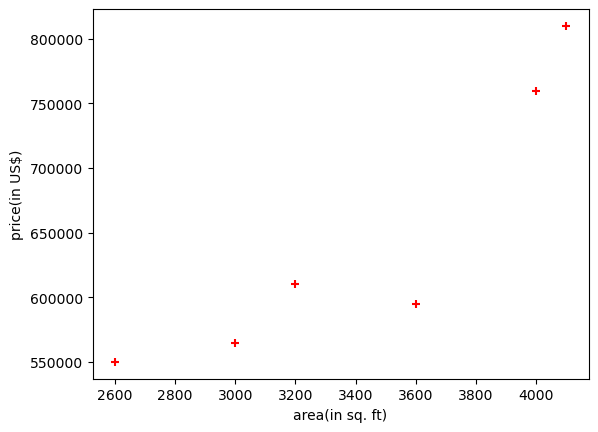

In [3]:
%matplotlib inline
plt.xlabel('area(in sq. ft)')
plt.ylabel('price(in US$)')
plt.scatter(df.area,df.price,color='red',marker='+')

In [4]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']].values,df.price)

LinearRegression()

In [5]:
reg.predict([[3300]])

array([628813.88621022])

In [6]:
d = pd.read_csv('areas.csv')
d

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [7]:
p = reg.predict(d.values)

In [8]:
d['prices'] = p
d

,area,prices
0,1000,2.440019e+05
1,1500,3.276567e+05
2,2300,4.615043e+05
3,3540,6.689682e+05
4,4120,7.660077e+05
5,4560,8.396239e+05
6,5490,9.952218e+05
7,3460,6.555834e+05
8,4750,8.714127e+05
9,2300,4.615043e+05


In [9]:
d.to_csv('prediction.csv',index=False)

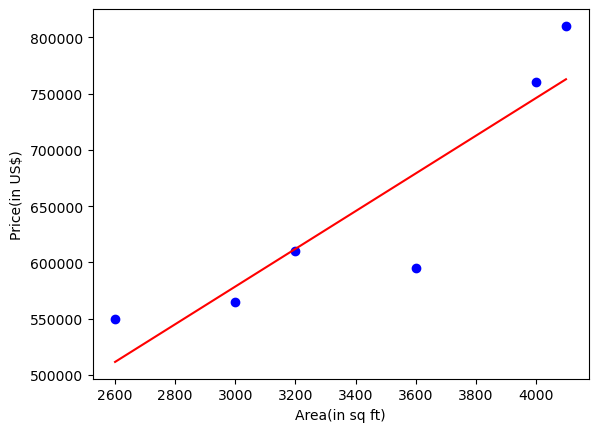

In [10]:
%matplotlib inline
plt.xlabel('Area(in sq ft)')
plt.ylabel('Price(in US$)')
plt.scatter(df.area,df.price,color='b')
plt.plot(df.area,reg.predict(df[['area']].values),color='red')

In [15]:
import pickle
with open('model_pickle','wb') as f:
    pickle.dump(reg,f)
with open('model_pickle','rb') as f:
    mp = pickle.load(f)
mp.predict([[5000]])

array([913240.11571842])

In [17]:
import joblib
joblib.dump(reg,'model_joblib')
mj = joblib.load('model_joblib')
mj.predict([[5000]])

array([913240.11571842])

In [18]:
mj.coef_

array([167.30954677])

In [19]:
mj.intercept_

76692.3818707813